# **Project2: Analyze A/B Test Results**
`This project will assure you have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. Good luck!`


## **Table of Contents**
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
### **Introduction**

`A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these`

`For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.`

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** `The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the`[RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).


<a id='probability'></a>
### **Part I - Probability**

> `To get started, let's import our libraries.`

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

> <a>1. Now, read in the **ab_data.csv** data. Store it in **df** Use your dataframe to answer the questions in **Quiz 1** of the classroom.

### **a. Read in the dataset and take a look at the top few rows here**

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.head(4)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


### **b. Use the below cell to find the number of rows in the dataset**

In [4]:
df.shape

(294478, 5)

In [5]:
all_users = float(df.shape[0])
all_users

294478.0

### **c. The number of unique users in the dataset.**

In [6]:
df['user_id'].nunique()

290584

### **d. The proportion of users converted**

In [7]:
Users_Converted=df.query('converted == 1')['user_id'].nunique()

In [8]:
P = (Users_Converted/all_users)

In [9]:
print("The proportion of users converted is {0:.0%}".format(P))

The proportion of users converted is 12%


### **e. The number of times the new_page and treatment don't line up.**

In [13]:
df.query('(group == "treatment" and landing_page != "new_page")')['user_id'].count()

1965

In [14]:
df[((df.group == 'treatment') == (df.landing_page == 'new_page')) == False].shape[0]

3893

### **f. Do any of the rows have missing values?**

In [15]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [16]:
df.isnull().values.any()

False



---

**2**.`For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to provide how we should handle these rows`

### **a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2.**
* `In this case, how should we handle the rows where the landing_page and group columns don't match?`

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |

In [17]:
# Remove the Messy rows
messy_rows=df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index

In [18]:
df2 = df.drop(messy_rows)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [19]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [20]:
df2.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

0

### **3. Use df2 and the cells below to answer questions for Quiz3 in the classroom.**
* **`a. How many unique user_ids are in df2?`**

In [21]:
df2['user_id'].nunique()

290584


* **`b. There is one user_id repeated in df2. What is it?`**

In [22]:
df2['user_id'].duplicated().any()

True

In [23]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

* **`c. What is the row information for the repeat user_id?`**

In [24]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [25]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


* **d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.**

In [26]:
df2=df2.drop_duplicates(subset=['user_id'], keep='first')

In [27]:
#check removing of duplicate in user id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [28]:
df2['user_id'].duplicated().any()

False

### **4. Use df2 in the below cells to answer the quiz questions related to Quiz 4 in the classroom.**

* **`a. What is the probability of an individual converting regardless of the page they receive?`**

In [29]:
P1=df2.query('converted == 1').count().sum()

In [30]:
Pt=df2.count().sum()

In [31]:
probability=P1/Pt

In [32]:
probability

0.11959708724499628

In [33]:
print("the probability of an individual converting regardless of the page they receive is  {0:.04}".format(probability))

the probability of an individual converting regardless of the page they receive is  0.1196


* **`b. Given that an individual was in the control group, what is the probability they converted?`**

In [34]:
P_control=df2.query('converted == 1 & group=="control"').count().sum()

In [35]:
control=df2.query('group=="control"').count().sum()

In [36]:
Prob_con=P_control/control

In [37]:
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(Prob_con))

 Given that an individual was in the control group, the probability they converted is 12.04%


* **`c. Given that an individual was in the treatment group, what is the probability they converted?`**

In [38]:
P_treatment=df2.query('converted == 1 & group=="treatment"').count().sum()

In [39]:
treatment=df2.query('group=="treatment"').count().sum()

In [40]:
Prob_treat=P_treatment/treatment

In [41]:
print(" Given that an individual was in the treatment group, the probability they converted is {0:.4}".format(Prob_treat))

 Given that an individual was in the treatment group, the probability they converted is 0.1188


* **`d. What is the probability that an individual received the new page?`**

In [42]:
P_new=df2.query('landing_page=="new_page"').count().sum()

In [43]:
all_received=df2.count().sum()

In [44]:
Prob_new=P_new/all_received

In [45]:
print(" the probability that an individual received the new page is {0:.4}".format(Prob_new))

 the probability that an individual received the new page is 0.5001


* **`e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.`**


> *  `The probability of an individual converting regardless of the page they receive is  0.1196.`
* `Given that an individual was in the control group, the probability they converted is 12.04%`
*  `Given that an individual was in the treatment group, the probability they converted is 0.1188`
* `The probablity that they converted in both control and treatment group are little bit similar,and probability of an individual converting regardless of the page they receive. therefore, there is no evidence that new page leads to more conversions`


### **Part II - A/B Test**

`Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.`

`However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?`

`These questions are the difficult parts associated with A/B tests in general.`

**`1. For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of  pold  and  pnew , which are the converted rates for the old and new pages`**

$H_0$: $p_{new}$ - $p_{old}$ <= 0

   $H_1$: $p_{new}$ - $p_{old}$ > 0


**`2. Assume under the null hypothesis,  pnew  and  pold  both have "true" success rates equal to the converted success rate regardless of page - that is  pnew  and  pold  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page`**
* `Use a sample size for each page equal to the ones in ab_data.csv.`
* `Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.`

* `Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.`

**`a. What is the convert rate for  pnew  under the null?`**

In [46]:
p_new =(df2.converted == 1).mean()
p_new

0.11959708724499628

In [47]:
print(" the convert rate for pnew under the null {0:.4}".format(p_new))

 the convert rate for pnew under the null 0.1196


**`b. What is the convert rate for  pold  under the null?`**

In [48]:
p_old = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
print(" the convert rate for p old under the null {0:.4}".format(p_old))

 the convert rate for p old under the null 0.1196


**c. What is $n_{new}$?**
* `the number of individuals in the treatment group?`

In [49]:
N_new = df2.query('group == "treatment"')['user_id'].nunique()
N_new 

145310

**d. What is $n_{old}$?**
*  `the number of individuals in the control group?`

In [50]:
N_old = df2.query('group == "control"')['user_id'].nunique() 
#display the number of unique users who has old page
N_old 

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [51]:
new_page_converted = np.random.choice([0,1],size=N_new, p=(1-p_new,p_new),replace=True)
print(new_page_converted)
new_page_converted.mean()

[1 0 0 ... 0 0 0]


0.11912463010116303

In [52]:
pp=new_page_converted.mean()

In [53]:
print("the mean of new page converted is {0:.4}".format(pp))

the mean of new page converted is 0.1191


* **p_new - p_old under the null.**

In [54]:
N_new_old = df2.query('group == "treatment" & group == "control"')['user_id'].nunique()

In [55]:
N_new_old 

0

**`f. Simulate  nold  transactions with a convert rate of  pold  under the null. Store these  nold  1's and 0's in old_page_converted.`**

In [56]:
old_page_converted = np.random.choice([0,1],N_old, p=(1-p_old,p_old),replace=True)
print(old_page_converted)
old_page_converted.mean()

[0 0 0 ... 0 0 0]


0.11943637540096645

**`g. Find  pnew  -  pold  for your simulated values from part (e) and (f).`**

In [57]:
new_page_converted.mean() - old_page_converted.mean()

-0.00031174529980342036

**`h. Simulate 10,000  pnew  -  pold  values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in a numpy array called p_diffs.`**

In [58]:
total_size = df2.shape[0]
total_size

290584

In [59]:
# sample distribution
p_diffs = []
for _ in range(10000):
  old_page_converted = np.random.choice([0,1],N_old, p=(1-p_old,p_old),replace=True)
  new_page_converted = np.random.choice([0,1],size=N_new, p=(1-p_new,p_new),replace=True)
  p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**`i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.`**

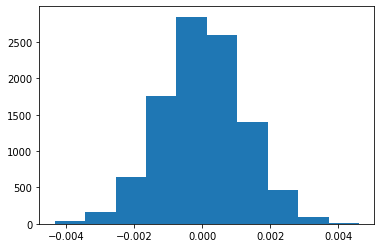

In [60]:
plt.hist(p_diffs);

In [61]:
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_new

17264

In [62]:
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_old

17489

In [63]:
Convt_new = float(convert_new)/ float(N_new) 
Convt_old = float(convert_old)/ float(N_old)

In [64]:
Obs_diff = Convt_new - Convt_old
Obs_diff

-0.0015782389853555567

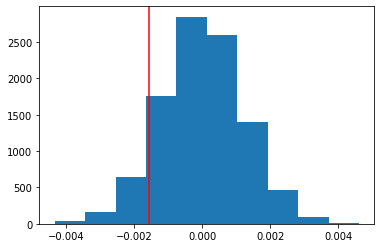

In [65]:
plt.hist(p_diffs)
#Plot vertical line for observed statistic
plt.axvline(x=Obs_diff,color ='red')

In [66]:
P_diffs=np.array(p_diffs)  

> j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [67]:
P_diffs.size

10000

In [68]:
Null_vals = np.random.normal(0,P_diffs.std(), 10000)
P_value=(Null_vals>Obs_diff).mean()
P_value

0.9006

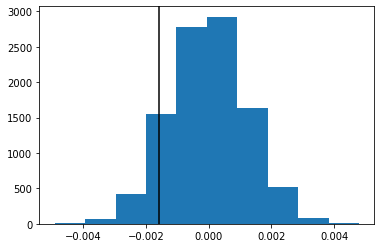

In [69]:
#Plot null distri
plt.hist(Null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=Obs_diff,color ='black')

>**k. In words, explain what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?**

* <a>P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.
* the p-value is large 0.9005 >0.05 that mean  pval > α ⇒ we will accept null hypothesis ,fail to Reject $H_0$.

>l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page

In [70]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old =  df2.query('group == "control"')['user_id'].nunique() 
n_new = df2.query('group == "treatment"')['user_id'].nunique()

In [71]:
print(convert_old, convert_new, n_old,n_new)

17489 17264 145274 145310


>m. Now use stats.proportions_ztest to compute your test statistic and p-value. Here is a helpful link on using the built in.

In [72]:
from statsmodels.stats.proportion import proportions_ztest

In [73]:
zscore, pval = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [74]:
zscore, pval

(-1.3109241984234394, 0.9050583127590245)

In [75]:
from scipy.stats import norm

norm.cdf(zscore)

0.09494168724097551

In [76]:
Zcrtl= norm.ppf(1-(0.05/2))
Zcrtl

1.959963984540054

>**n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?**

* <a>Because  the value of Zscore is -1.3109 does not exceed the critical value of 1.95, we will accept the null hypothesis that old page users has a better or equal converted rate than new page users. 

* <a>The converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.
 

<a id='regression'></a>
### **Part III - A regression approach**
`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

>a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

* <a>Logistic Regression, because the outcome is categorical

>b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  
* Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
#create a colum for the intercept
df2['intercept'] = 1

<ipython-input-77-d3a0f69ae7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


In [78]:
#convert categorical value to numerical
df2= df2.join(pd.get_dummies(df2['landing_page']))

In [79]:
#create a dummy variable column 
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']

In [80]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


> c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [81]:
import statsmodels.api as sm
logt_model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [82]:
Result = logt_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


>d. Provide the summary of your model below, and use it as necessary to answer the following questions

In [83]:
print(Result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Jan 2023   Pseudo R-squ.:               8.077e-06
Time:                        12:45:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


>e. What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

**Hint:** What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the Part II?

**ANS:**
* <a>The p-value associated with ab_page is 0.1899.
* so we will accept null value ,because 0.1899 is more than 0.05.
* since  coef  is negative ,so the new page doesn't get more conversion rate,and we will keep old page
* The logistic regression model shows that the new page has no effect on conversion rate
* The null hypotheses is  that there is no difference between the treatment and control group.
*  Alternative hypotheses is that there is difference between the treatment and control group

>f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANS:**
* <a> Other feature can be considerated is the time(timestamp). We will check if the converted rate depends on time or not  when user browerse the website.


* <a> The disadvantage of adding new factors to regression models is that doing so will make the models interpretation more difficult. In addition, if the new factors are reliable variables when combined with the existing explanatory variables, we will need to add higher order terms to help us predict the results more accurately.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [84]:
Countries = pd.read_csv('/content/countries.csv')
Countries .head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [85]:
#Join ab dataset with country dataset
data_merged = df2.merge(Countries, on ='user_id', how='inner')
data_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [86]:
Countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [87]:
data_merged[['CA','UK','US']] = pd.get_dummies(data_merged['country'])
data_merged = data_merged.drop(data_merged['CA'])

In [88]:
data_merged

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,CA,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0,US,0,0,1
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0,US,0,0,1
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0,US,0,0,1
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,1,0,US,0,0,1


In [89]:
model = sm.Logit(data_merged['converted'], data_merged[['intercept','new_page','UK','US']])
Result = model.fit()
print(Result.summary())

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Jan 2023   Pseudo R-squ.:               2.325e-05
Time:                        12:45:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1757
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.248      0.000      -2.082      -1.978
new_page      -0.0150      0.

>h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
#Create a new variable between new page and country US and UK
data_merged['UK_New_Page'] = data_merged['new_page']* data_merged['UK']
data_merged['US_New_Page'] = data_merged['new_page']* data_merged['US']

In [91]:
model4= sm.Logit(data_merged['converted'], data_merged[['intercept','new_page','UK_New_Page','US_New_Page','UK','US']])
Result4 = model4.fit()
print(Result4.summary())

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Jan 2023   Pseudo R-squ.:               3.484e-05
Time:                        12:45:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1917
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674    

><a>ANS:**The conversion rate of the new page is not larger than the old page. I will accept the null hypothesis. From the logistic regression above we see that the p-value is higher in US than in UK, which means that in the US it is more likely to have higher convertion rate, but still there isn't enough evidence to reject the null hypothesis.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [93]:
# %%shell
# jupyter nbconvert --to html /content/Analyze_A_B_Test_1.ipynb